In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [72]:
train.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
0,-2.617352,0.076393,2.983578,1.948533,-2.179625,1.383055,0.605370,0.392333,0.624508,3.335226,0
1,0.773882,0.115492,-0.269992,0.068611,-1.954053,-1.696397,-2.325362,1.713892,0.428204,3.032367,1
2,2.069321,0.576924,-4.366182,-2.878236,-0.820200,-1.705330,-2.180334,-0.354162,1.514298,-0.523202,0
3,2.552118,1.013799,-2.277174,3.268998,-1.368380,-2.841382,-0.528595,2.827495,-0.530821,2.536053,1
4,-3.526157,1.765411,3.387213,3.143327,1.148334,4.669884,-1.874473,4.429877,-4.444939,-0.148351,0


In [73]:
test.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10
0,-3.639953,0.109267,0.964822,1.858229,-0.121215,-1.649608,1.315433,0.207882,-0.036077,2.316813
1,0.464422,1.326382,-3.046868,-0.548189,-3.336654,1.505991,-0.457241,0.158563,-0.208908,4.168585
2,1.579458,-1.372891,0.260192,3.434472,-0.426822,-1.452594,-3.248802,0.896926,-1.592099,2.501838
3,0.974967,-1.353520,-0.575540,1.293694,-0.854620,-0.685428,2.567943,-2.987233,0.603773,0.718341
4,-0.450050,-1.571200,-4.765986,-1.630338,1.732338,2.314866,1.823365,-0.687495,1.044425,1.641965


In [74]:
X_train = train.drop(columns='y')
y_train = train['y']
X_test = test

In [75]:
print(X_train.info())
print(X_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     750 non-null    float64
 1   x_2     750 non-null    float64
 2   x_3     750 non-null    float64
 3   x_4     750 non-null    float64
 4   x_5     750 non-null    float64
 5   x_6     750 non-null    float64
 6   x_7     750 non-null    float64
 7   x_8     750 non-null    float64
 8   x_9     750 non-null    float64
 9   x_10    750 non-null    float64
dtypes: float64(10)
memory usage: 58.7 KB
None
              x_1         x_2         x_3         x_4         x_5         x_6  \
count  750.000000  750.000000  750.000000  750.000000  750.000000  750.000000   
mean     0.390728    0.544366   -0.547464    0.096914   -0.502479    0.130567   
std      2.193495    1.929924    2.071596    2.211920    2.100331    2.022832   
min     -5.851454   -4.891351   -7.088418   -6.001515   -6.774270   -6.158530   

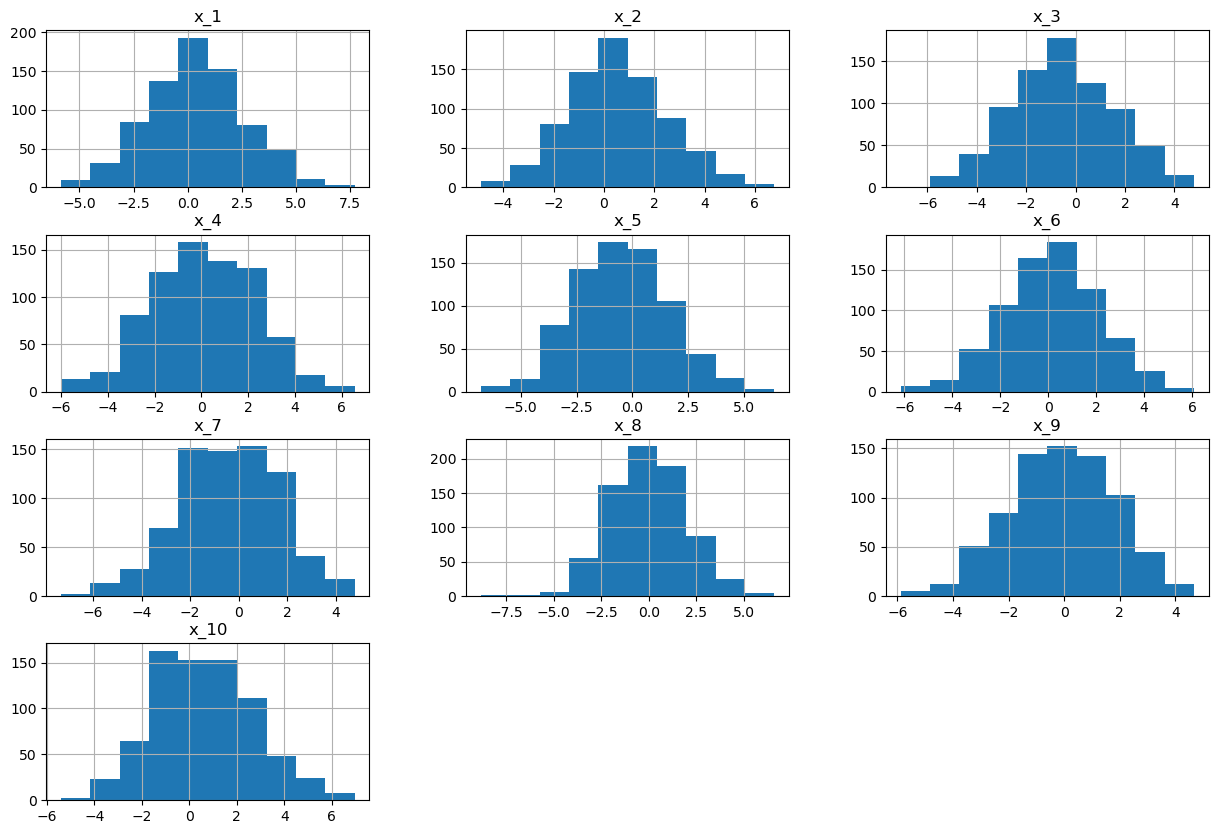

In [76]:
X_train.hist(bins= 10, figsize = (15,10))
plt.show()

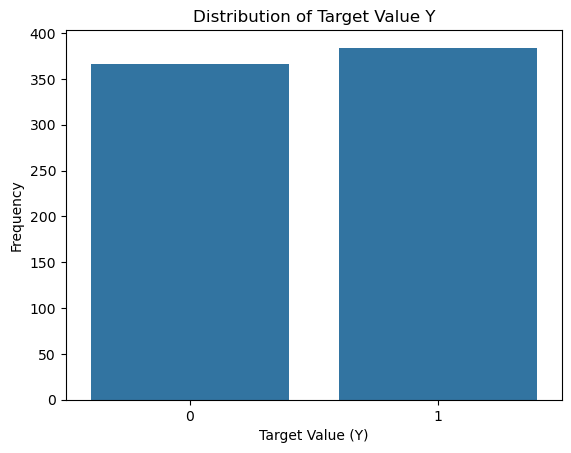

In [77]:
sns.countplot(x=y_train)
plt.xlabel('Target Value (Y)')
plt.ylabel('Frequency')
plt.title('Distribution of Target Value Y')
plt.show()

<h5> Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

LR = LogisticRegression(max_iter= 1000)

LR_scores = cross_val_score(LR, X_train, y_train, cv=5)
print("\nCross-validation scores:", LR_scores)
print("Mean cross-validation score:", LR_scores.mean())


Cross-validation scores: [0.78666667 0.77333333 0.85333333 0.78       0.82      ]
Średnia cross-validation score: 0.8026666666666668


<h5>  Logistic Regression augmented

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

LR_AUG_DEG2 = LogisticRegression(max_iter=1000)

LR_scores_aug = cross_val_score(LR_AUG_DEG2, X_train_poly, y_train, cv=5)
print("\nCross-validation scores:", LR_scores_aug )
print("Mean cross-validation score:", LR_scores_aug .mean())



Cross-validation scores: [0.91333333 0.9        0.91333333 0.94       0.94666667]
Średnia cross-validation score: 0.9226666666666666


In [ ]:
poly_deg3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly2 = poly_deg3.fit_transform(X_train)

LR_AUG_DEG3 = LogisticRegression(max_iter=1000)

LR_scores_aug_deg3 = cross_val_score(LR_AUG_DEG3, X_train_poly2, y_train, cv=5)
print("\nCross-validation scores:", LR_scores_aug_deg3 )
print("Mean cross-validation score:", LR_scores_aug_deg3.mean())


Cross-validation scores: [0.85333333 0.91333333 0.89333333 0.88       0.92666667]
Średnia cross-validation score: 0.8933333333333333


<h5>  LDA classic and augmented

In [ ]:
lda = LinearDiscriminantAnalysis()



cv_scores_lda= cross_val_score(lda, X_train, y_train, cv=5)
print("\nCross-validation scores:", cv_scores_lda)
print("Mean cross-validation score:", cv_scores_lda.mean())


Cross-validation scores: [0.82       0.76       0.84666667 0.78       0.83333333]
Średnia cross-validation score: 0.808


In [ ]:
lda_aug = LinearDiscriminantAnalysis()


cv_scores_lda_aug= cross_val_score(lda_aug, X_train_poly, y_train, cv=5)
print("\nCross-validation scores:", cv_scores_lda_aug)
print("Mean cross-validation score:", cv_scores_lda_aug.mean())


Cross-validation scores: [0.91333333 0.87333333 0.94       0.92666667 0.96      ]
Średnia cross-validation score: 0.9226666666666666


In [ ]:
lda_aug2 = LinearDiscriminantAnalysis()


cv_scores_lda_aug2= cross_val_score(lda_aug2, X_train_poly2, y_train, cv=5)
print("\nCross-validation scores:", cv_scores_lda_aug2)
print("Mean cross-validation score:", cv_scores_lda_aug2.mean())


Cross-validation scores: [0.88666667 0.86       0.87333333 0.88       0.9       ]
Średnia cross-validation score: 0.8800000000000001


<h5>  Let's try QDA

In [ ]:
qda = QuadraticDiscriminantAnalysis()


cv_scores_qda= cross_val_score(qda, X_train, y_train, cv=5)
print("\nCross-validation scores:", cv_scores_qda)
print("Mean cross-validation score:", cv_scores_qda.mean())


Cross-validation scores: [0.90666667 0.90666667 0.91333333 0.94       0.96      ]
Średnia cross-validation score: 0.9253333333333333


<h5> Non-parametric Density Clasiffier

In [85]:
from sklearn.neighbors import KernelDensity

class DensityClassifier:
    def __init__(self, bandwidth=0.5, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        self.kde_models = {}
        self.classes_ = None
        self.log_priors_ = {}
        
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for c in self.classes_:
            X_c = X[y == c]
            kde = KernelDensity(kernel = self.kernel, bandwidth = self.bandwidth)
            kde.fit(X_c)
            self.kde_models[c] = kde
            self.log_priors_[c] = np.log(len(X_c) / len(X))
        
    def predict(self, X):
        scores = np.zeros((X.shape[0], len(self.classes_)))
        for i, c in enumerate(self.classes_):
            log_density = self.kde_models[c].score_samples(X) # liczy logarytm
            scores[:, i] = log_density + self.log_priors_[c]
        predictions = self.classes_[np.argmax(scores, axis = 1)]
        return predictions
    def get_params(self, deep=True):
        return {"bandwidth": self.bandwidth, "kernel": self.kernel}

kdf = DensityClassifier()


In [ ]:
cv_scores_kdf = cross_val_score(kdf, X_train.to_numpy(),y_train.to_numpy(),scoring='accuracy')
print("\nCross-validation scores:", cv_scores_kdf)
print("Mean cross-validation score:", cv_scores_kdf.mean())


Cross-validation scores: [0.86       0.91333333 0.89333333 0.88       0.93333333]
Średnia cross-validation score: 0.8960000000000001


<h5>  I choose the model with the highest mean score from crossvalidation - QDA

In [87]:
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [88]:
y_predicted = qda.predict(X_test)